## Homework

Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

Dataset
In this homework, we will use the Car price dataset. Download it from here.

Or you can do it with wget:

wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

We'll keep working with the MSRP variable, and we'll transform it to a classification task.

Features
For the rest of the homework, you'll need to use only these columns:

- Make,
- Model,
- Year,
- Engine HP,
- Engine Cylinders,
- Transmission Type,
- Vehicle Style,
- highway MPG,
- city
- mpg


**Data preparation**

Select only the features from above and transform their names using next line:

    data.columns = data.columns.str.replace(' ', '_').str.lower()

- Fill in the missing values of the selected features with 0.
- Rename MSRP variable to price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# read dataset
df_full=pd.read_csv(r'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
df_full.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data Preparation

In [4]:
df_full.columns = df_full.columns.str.replace(' ', '_').str.lower()

In [5]:
categorical_columns=df_full.dtypes[df_full.dtypes=='object'].index

In [6]:
for c in categorical_columns:
    df_full[c]=df_full[c].str.replace(' ', '_').str.lower()

In [7]:
df_full['price']=df_full.msrp
df_full.drop('msrp',axis=1,inplace=True)

In [8]:
df_full.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


**Question 1**

What is the most frequent observation (mode) for the column transmission_type?

- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [9]:
df=df_full[[
'make',
'model',
'year',
'engine_hp',
'engine_cylinders',
'transmission_type',
'vehicle_style',
'highway_mpg',
'city_mpg',
'price'
]]

In [10]:
print("Missing Values Before Imputation")
df.isnull().sum()

Missing Values Before Imputation


make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [11]:
df.transmission_type.mode()

0    automatic
Name: transmission_type, dtype: object

In [12]:
df=df.fillna(0)

In [13]:
print("Missing Values After Imputation")
df.isnull().sum()

Missing Values After Imputation


make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [14]:
df.transmission_type.value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [15]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [16]:
## keep numeric values

In [17]:
df_numeric=df.dtypes[df.dtypes!='object'].index

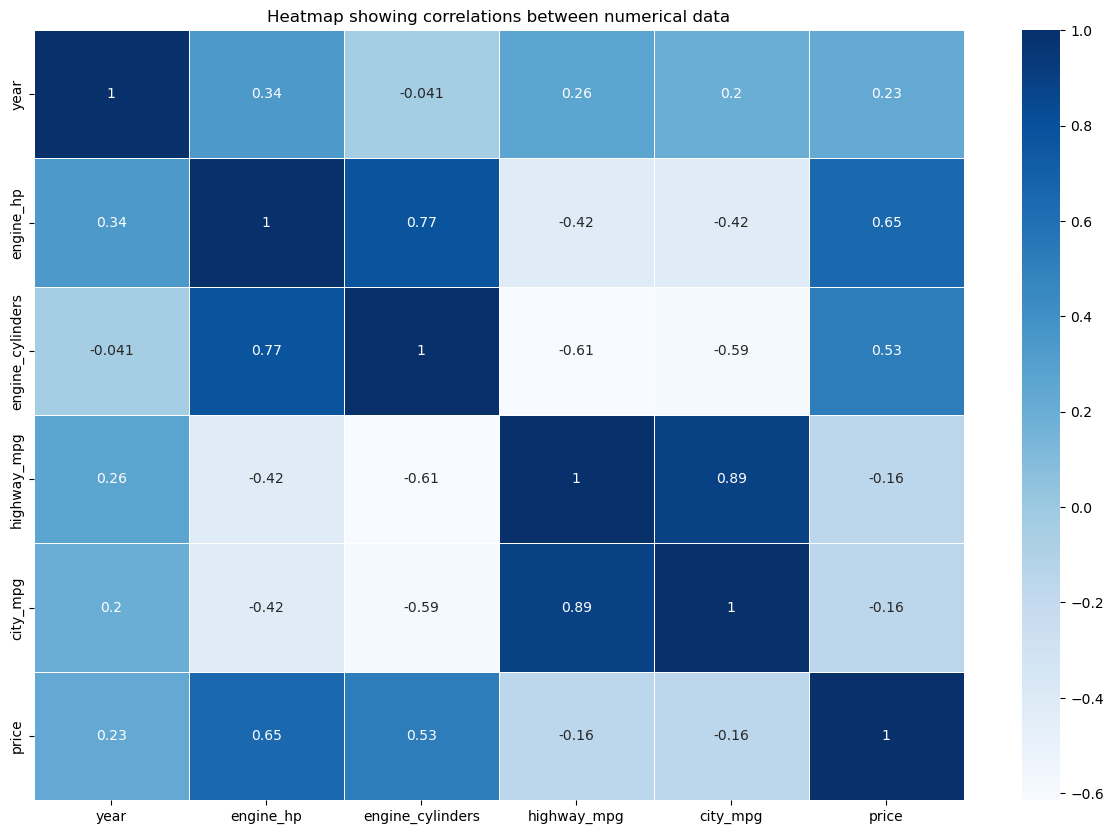

In [18]:
#@ INSPECTING HEATMAP:
plt.figure(figsize=(15,10))  
sns.heatmap(df[df_numeric].corr(),annot=True,linewidths=.7, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [19]:
df[df_numeric].corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


In [20]:
df[df_numeric].corr().loc["engine_hp","year":"engine_hp"]

year         0.338714
engine_hp    1.000000
Name: engine_hp, dtype: float64

In [21]:
df[df_numeric].corr().loc["highway_mpg","engine_hp"]

-0.4157071259973855

In [22]:
df[df_numeric].corr().loc["highway_mpg","city_mpg"]

0.8868294962591425

In [23]:
df[df_numeric].corr().unstack().sort_values(ascending = False)[:15]

year              year                1.000000
engine_hp         engine_hp           1.000000
city_mpg          city_mpg            1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
dtype: float64

The correct answer is highway_mpg city_mpg

In [24]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df, test_size=0.25, random_state=42)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
#@ PROCESSING THE DATASET:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

**Question 3**

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

- make
- model
- transmission_type
- vehicle_style

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
#@ PREPARING DATASET:
cat = df_train.dtypes[df_train.dtypes=='object'].index

#@ DEFINING FUNCTION:
def calculate_mi(series):
    return mutual_info_score(series, df_train.price)

#@ IMPLEMENTATION:
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
model,5.514233
make,2.752448
vehicle_style,1.703935
transmission_type,0.583783


**Question 4**

Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [29]:
df_train.drop('price',axis=1,inplace=True)
df_val.drop('price',axis=1,inplace=True)
df_test.drop('price',axis=1,inplace=True)

In [30]:
from sklearn.feature_extraction import DictVectorizer

In [38]:
num=list((df_train.dtypes!='object').index)
cat=list((df_train.dtypes=='object').index)

In [39]:
#@ TRANSFORMING THE DATASET:

train_dict = df_train[cat + num].to_dict(orient='records')

#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

C:\Users\ggrigoriou\AppData\Local\Temp\ipykernel_16192\2170164272.py:3: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dict = df_train[cat + num].to_dict(orient='records')


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [46]:
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

**Question 5**

Let's find the least useful feature using the feature elimination technique.
Train a model with all these features (using the same parameters as in Q4).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

- year
- engine_hp
- transmission_type
- city_mpg

Note: the difference doesn't have to be positive

**Question 6**

For this question, we'll see how to use a linear regression model from Scikit-Learn.
We'll need to use the original column price. Apply the logarithmic transformation to this column.
Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
Round your RMSE scores to 3 decimal digits.
Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

Note: If there are multiple options, select the smallest alpha.